<a href="https://colab.research.google.com/github/SachinScaler/May25_MathsForML/blob/main/Optimization_5_Principal_component_analysis%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
epoch = 10 # 10 passes through full dataset during gradient descent

In [ ]:
num_rows = data.shape[0]
lr = 0.01
for e in range(epoch):
  for i in range(num_rows): # 1 million data_points
    w = w - lr * gradient(w, data[i]) # vector to vector multiplication

In [ ]:
num_rows = data.shape[0]
lr = 0.01
for e in range(epoch):
  for i in range(num_rows): # 1 million data_points
    rand_i = random.randint(0, num_rows-1)
    w = w - lr * gradient(w, data[rand_i]) # vector to vector multiplication

In [19]:
# full batch GD: Vanilla grad descent
for e in range(epoch):
    w = w - lr * gradient(w, data) # vector to matrix multiplication

NameError: name 'epoch' is not defined

In [25]:
import random


In [22]:
num_rows = data.shape[0]
lr = 0.01
batch_size = 10

for e in range(epoch):
  for i in range(num_rows//batch_size): # 1 million data_points/ 10
    rand_indexes = [random.randint(0, 10) for i in range(batch_size)]
    w = w - lr * gradient(w, data[rand_indexes]) # vector to vector multiplication

NameError: name 'epoch' is not defined

In [26]:
!gdown 16elpyaPZhS63ibzIdetEjZhCO4FpVSZu

Downloading...
From: https://drive.google.com/uc?id=16elpyaPZhS63ibzIdetEjZhCO4FpVSZu
To: /content/pca_2d_data.csv
100% 778/778 [00:00<00:00, 2.95MB/s]


In [27]:
import pandas as pd
data = pd.read_csv('/content/pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


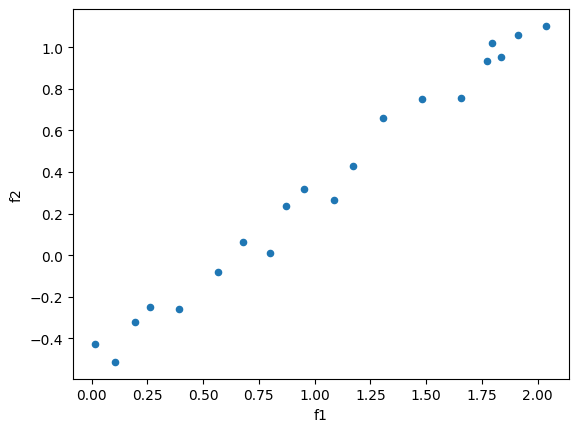

In [28]:
import matplotlib.pyplot as plt
import numpy as np

data.plot(x='f1', y='f2', kind='scatter')
plt.show()

## Scratch Implementation: PCA

In [29]:
# Step 1: Column standardization
mu = data.mean(axis = 0)

mu

,0
f1,1.044555
f2,0.335049


In [31]:
mu = data.mean(axis = 0)
std = data.std(axis = 0)
X_st = (data - mu) / std
X_st

,f1,f2
0,1.506222,1.415682
1,-0.265151,-0.178906
2,1.138257,1.263742
3,-1.425667,-1.565047
4,0.659017,0.766476
5,1.315302,1.339413
6,-1.290001,-1.210720
7,1.100540,1.104821
8,0.925952,0.773581
9,-0.556604,-0.502952


In [43]:
# Step 2: Eigenvalue decomposition:
# input: Covariance matrix: X.X
# output: eigen_values: real_number and eigen_vector
cov_X_st = np.matmul(X_st.T, X_st)
cov_X_st


eigen_values, eigen_vectors = np.linalg.eig(cov_X_st)
eigen_values

array([37.85422556,  0.14577444])

In [36]:
eigent_vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [38]:
eigen_values[0], eigen_vectors[0]

(np.float64(37.85422555951133), array([ 0.70710678, -0.70710678]))

In [49]:
# output: Information retained in eigenvector[0]: eigenvalues[0]/(eigenvalues[1] + eigenvalues[0])
# output: Information retained in eigenvector[0]:

eigen_values[0]/np.sum(eigen_values) * 100

np.float64(99.61638305134561)

In [50]:
eigen_vectors[1]

array([0.70710678, 0.70710678])

In [51]:
eigen_values[1]/np.sum(eigen_values) * 100

np.float64(0.38361694865440127)

In [55]:
# Step 3: Reduce the dimension!
# Choose the eigenvector corresponding to the largest eigenvalue and project points on that vector
# np.argmax(eigen_values)
best_new_feature = eigen_vectors[0]
best_new_feature


# dot product of original dataser with best_new_feature
X_new = np.matmul(X_st, best_new_feature)
X_new

,0
0,0.064022
1,-0.060984
2,-0.088731
3,0.098557
4,-0.075985
5,-0.017049
6,-0.056060
7,-0.003027
8,0.107743
9,-0.037938


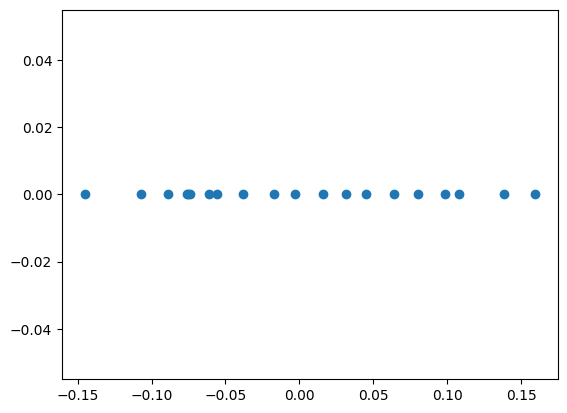

In [56]:
# Step 4: Visualize
plt.figure()
plt.scatter(X_new, np.zeros(20) )
plt.show()

#### Alternative Implementation: PCA implementation using Sklearn library


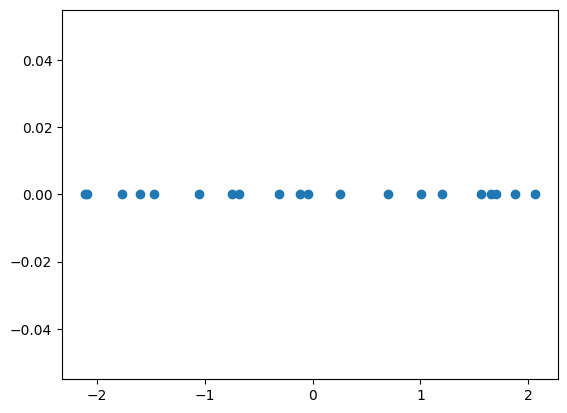

In [57]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=2)

X_p = pca.fit_transform(X_st)

plt.figure()
plt.scatter(X_p[:, 0], np.zeros(20) )
plt.show()

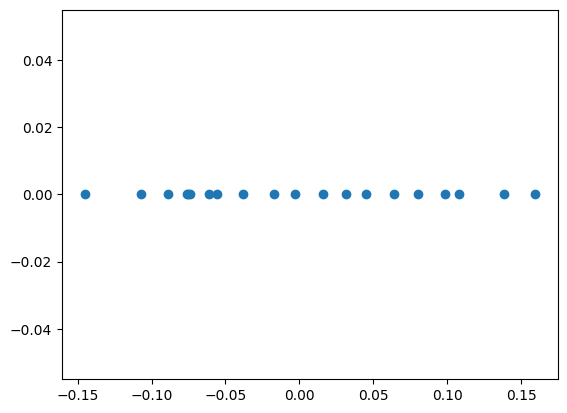

In [ ]:
plt.figure()
plt.scatter(X_p[:, 1], np.zeros(20) )
plt.show()

In [58]:
pca.explained_variance_ #explained_variance_

array([1.99232766, 0.00767234])

In [59]:
pca.explained_variance_[0]/(pca.explained_variance_[0] + pca.explained_variance_[1])

np.float64(0.9961638305134561)

What is the role of eigenvalues and eigenvectors in Principal Component Analysis (PCA)?

```
A)
`Eigenvectors determine the amount of variance` along each principal component, and eigenvalues represent the direction of these components.
B)
Eigenvalues and eigenvectors are used to randomly shuffle the data points in PCA
C)
Eigenvectors determine the mean values of the dataset, and Eigenvalues determine the number of features in the dataset
D)
Eigenvalues determine the amount of variance along each principal component, and eigenvectors represent the direction of these components.

```